In [1]:
import gdown
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import random

In [2]:
# Function to download file from Google Drive
def download_file_from_google_drive(file_id, dest_path):
    gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", dest_path, quiet=False)

In [3]:
# Function to load tokenizer from JSON file
def load_tokenizer(tokenizer_path):
    with open(tokenizer_path, 'r', encoding='utf-8') as f:
        tokenizer_json = f.read()
        tokenizer = tokenizer_from_json(tokenizer_json)
    return tokenizer

In [4]:
# Function to extract image features using VGG16 model
def extract_features(image_path, vgg_model):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    feature = vgg_model.predict(image[np.newaxis, ...])
    return feature

# Function to generate caption for an image
def generate_caption(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = tokenizer.index_word.get(yhat, '')
        if word is None or word == 'endseq':
            break
        in_text += ' ' + word
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [5]:
# File IDs for tokenizer and model
tokenizer_file_id = '1--wwt1yGAgSyZHbyhO-ZVSgieRUiZncm'
model_file_id = '1-Adoco7KagpLAf1GjIZtn3ph35JOGQnI'

# Paths to save downloaded files
tokenizer_path = 'tokenizer.json'
model_path = 'model.h5'

# Download tokenizer and model from Google Drive
download_file_from_google_drive(tokenizer_file_id, tokenizer_path)
download_file_from_google_drive(model_file_id, model_path)

Downloading...
From: https://drive.google.com/uc?export=download&id=1--wwt1yGAgSyZHbyhO-ZVSgieRUiZncm
To: /content/tokenizer.json
100%|██████████| 334k/334k [00:00<00:00, 35.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-Adoco7KagpLAf1GjIZtn3ph35JOGQnI
To: /content/model.h5
100%|██████████| 43.8M/43.8M [00:00<00:00, 124MB/s]


In [6]:
# Load the VGG16 model for feature extraction
vgg_model = VGG16(weights='imagenet')
vgg_model = tf.keras.Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

# Load tokenizer and model
tokenizer = load_tokenizer(tokenizer_path)
model = load_model(model_path)


553467096/553467096 [==============================] - 3s 0us/step


In [7]:
# Directory in Google Drive containing images (replace with your folder path)
images_folder_path = '/content/drive/MyDrive/NLP/Image_set/'

In [8]:
# Function to get a list of image file paths in the folder
def get_image_paths(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]
    return [os.path.join(folder_path, img) for img in image_files]

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Get image paths
image_paths = get_image_paths(images_folder_path)

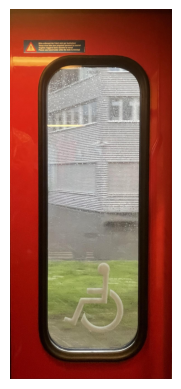

1/1 [==============================] - 1s 868ms/step
Image: aar_test_04991.jpg
Caption: the the the
----------------------------------------------


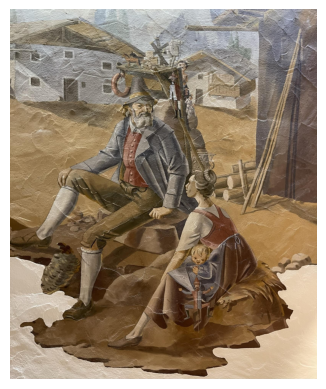

1/1 [==============================] - 1s 524ms/step
Image: aar_test_04825.jpg
Caption: the the the the the
----------------------------------------------


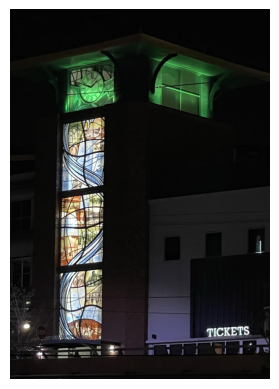

1/1 [==============================] - 1s 519ms/step
Image: aar_test_04808.jpg
Caption: the the the the the the
----------------------------------------------


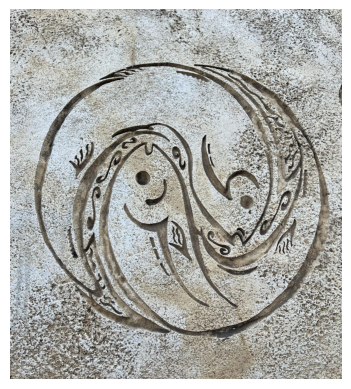

1/1 [==============================] - 1s 547ms/step
Image: aar_test_04629.jpg
Caption: fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish fish
----------------------------------------------


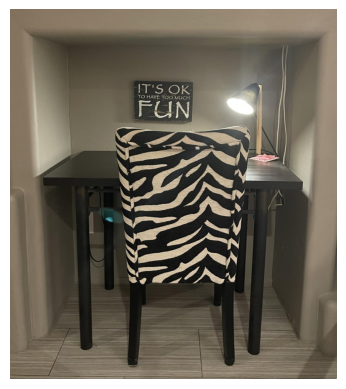

1/1 [==============================] - 1s 511ms/step
Image: aar_test_04904.jpg
Caption: a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
----------------------------------------------


In [13]:
# Randomly select a few images
num_images_to_display = 5
random_images = random.sample(image_paths, num_images_to_display)
# Adjust max_length according to your model's sequence length
max_length = 100

# Display images and generate captions
for image_path in random_images:
    # Load and plot image
    img = load_img(image_path)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Extract features and generate caption
    photo = extract_features(image_path, vgg_model)
    caption = generate_caption(model, tokenizer, photo, max_length=max_length)
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Caption: {caption}")
    print("----------------------------------------------")